In [8]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # -1 using only cpu GPU off and 0 GPU on

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install -U gensim

In [ ]:
%cd /content/drive/MyDrive/ZSLSUN

In [ ]:
!cp /content/drive/MyDrive/Zero-shot-main/Zero-short-learning/Practice-zsl/datset8thjuly2022.zip ./

In [1]:
!ls


'ls' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'tf' is not defined

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from typing import List, Tuple, Dict
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

In [3]:
tf.test.is_gpu_available() # gpu aval

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# !nvidia-smi

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import gensim as gs
import sklearn.metrics.pairwise as skpairwise
import gensim.downloader as gdownloader
from matplotlib import pyplot as plt
from typing import List, Tuple, Dict
#from google.colab.patches 
import cv2
import glob


In [ ]:
!unzip /content/drive/MyDrive/datset8thjuly2022.zip

In [ ]:
pwd

In [3]:
batch_size = 2
img_height = 224
img_width = 224

In [4]:
train_data=tf.keras.utils.image_dataset_from_directory('train classes',labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'train classes',labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 30337 files belonging to 40 classes.
Using 24270 files for training.
Found 30337 files belonging to 40 classes.
Using 6067 files for validation.


In [5]:
lenth_train_data = len(train_data.file_paths)
lenth_val_data = len(val_ds.file_paths)
lenth_train_data,  lenth_val_data

(24270, 6067)

In [ ]:
# train_data=tf.keras.utils.image_dataset_from_directory('sun small',labels="inferred",
#   label_mode="int",                                                     
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   'sun small',labels="inferred",
#   label_mode="int",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
type(train_data)

In [6]:
class_names = train_data.class_names
print(class_names)

['antelope', 'bat', 'beaver', 'blue_whale', 'bobcat', 'buffalo', 'chihuahua', 'collie', 'cow', 'dalmatian', 'deer', 'dolphin', 'elephant', 'fox', 'german_shepherd', 'giraffe', 'gorilla', 'grizzly_bear', 'hamster', 'horse', 'killer_whale', 'lion', 'mole', 'moose', 'mouse', 'otter', 'ox', 'polar_bear', 'rabbit', 'rhinoceros', 'sheep', 'siamese+cat', 'skunk', 'spider_monkey', 'squirrel', 'tiger', 'walrus', 'weasel', 'wolf', 'zebra']


In [ ]:
for x1,y1 in train_data:
  print(class_names[y1.numpy()[0]],y1.numpy()[0])
  mapp_check = zip(x1.numpy(),y1.numpy())
  cv2.imshow('',x1[0].numpy())
  
  #cv2.destroyWindow('')
  #cv2.waitKey(0)
  break

In [7]:
x_l=[]
y_l = []
for x,y in train_data:
  x_l.append(x)
  y_l.append(y)
x_train=np.concatenate(x_l,axis=0)
y_train =np.concatenate(y_l,axis=0)


In [ ]:
# x_train,val_dat = 0,0

In [8]:
x_l=[]
y_l = []
for x,y in val_ds:
  x_l.append(x)
  y_l.append(y)
val_dat=np.concatenate(x_l,axis=0)
y_test =np.concatenate(y_l,axis=0)

In [9]:
fine_labels: List[str] = class_names
fine_labels

['antelope',
 'bat',
 'beaver',
 'blue_whale',
 'bobcat',
 'buffalo',
 'chihuahua',
 'collie',
 'cow',
 'dalmatian',
 'deer',
 'dolphin',
 'elephant',
 'fox',
 'german_shepherd',
 'giraffe',
 'gorilla',
 'grizzly_bear',
 'hamster',
 'horse',
 'killer_whale',
 'lion',
 'mole',
 'moose',
 'mouse',
 'otter',
 'ox',
 'polar_bear',
 'rabbit',
 'rhinoceros',
 'sheep',
 'siamese+cat',
 'skunk',
 'spider_monkey',
 'squirrel',
 'tiger',
 'walrus',
 'weasel',
 'wolf',
 'zebra']

In [10]:
y_train = np.reshape(y_train,(lenth_train_data,1))
y_test = np.reshape(y_test,(lenth_val_data,1))

In [11]:
y_train_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_train)))
y_test_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_test)))

In [12]:
print(np.unique(np.append(y_train, y_test)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


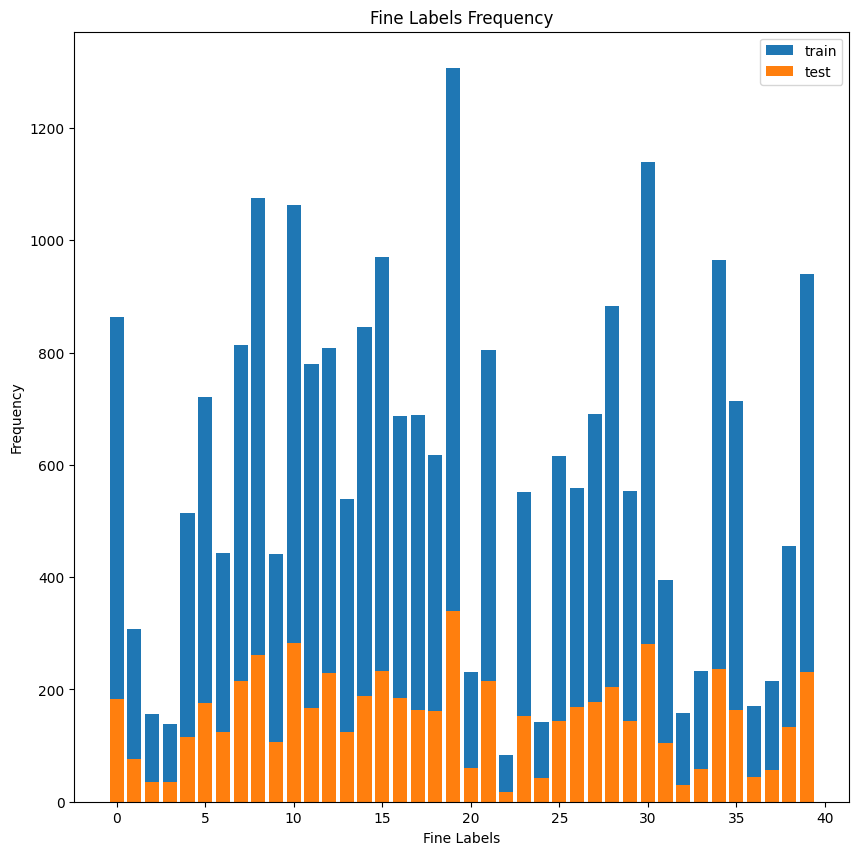

In [13]:
unique: np.ndarray = None
counts: int = 0

plt.figure(figsize=(10, 10))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, label='train')
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, label='test')

plt.title('Fine Labels Frequency')
plt.xlabel('Fine Labels')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [ ]:
fast_text_vectors: gs.models.keyedvectors = gdownloader.load(
     "fasttext-wiki-news-subwords-300")

In [ ]:
! pwd

In [ ]:
ls

In [14]:
from gensim.models.keyedvectors import KeyedVectors
# fast_text_vectors.save('fstwk.d2v')
fast_text_vectors = KeyedVectors.load("fstwk.d2v")

In [15]:
fine_labels_words: List[List[str]] = list(
    map(tf.keras.preprocessing.text.text_to_word_sequence, fine_labels))

word_list: List[str] = None
for word_list in fine_labels_words:
    print(word_list)

['antelope']
['bat']
['beaver']
['blue', 'whale']
['bobcat']
['buffalo']
['chihuahua']
['collie']
['cow']
['dalmatian']
['deer']
['dolphin']
['elephant']
['fox']
['german', 'shepherd']
['giraffe']
['gorilla']
['grizzly', 'bear']
['hamster']
['horse']
['killer', 'whale']
['lion']
['mole']
['moose']
['mouse']
['otter']
['ox']
['polar', 'bear']
['rabbit']
['rhinoceros']
['sheep']
['siamese', 'cat']
['skunk']
['spider', 'monkey']
['squirrel']
['tiger']
['walrus']
['weasel']
['wolf']
['zebra']


In [16]:
word_list: List[str] = None
word: str = ''
for word_list in fine_labels_words:
    for word in word_list:
        try:
            fast_text_vectors.word_vec(word)
        except Exception as err:
            print(f"-----{word} isn't in corpus----")

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  


In [17]:
def word_list_to_avg_vector(lst: List[str]) -> np.ndarray:
    """
    Transform a word list to its average vector
    Parameters:
        lst (List[str]): string to transform to vector
    Returns:
        np.ndarray: vector representation of word list
    """
    # create empty array
    vec: np.ndarray = np.array([0.0] * 300)

    word: str = ''
    for word in lst:
        # add word vector to sentence vectors or zero if no word vector
        vec += fast_text_vectors.word_vec(word)

    # return average vector (take sentence length into consideration)
    return vec / len(lst)


fine_labels_vecs = np.asarray(list(
    map(word_list_to_avg_vector, fine_labels_words)))

print(f"fine labels vectors shape: {fine_labels_vecs.shape}")

fine labels vectors shape: (40, 300)


C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  from ipykernel import kernelapp as app


In [18]:
print(fine_labels_vecs)

[[-0.05613    0.0256     0.024074  ... -0.037376  -0.042778   0.028254 ]
 [-0.10026   -0.096037   0.027323  ...  0.028947   0.17475   -0.082389 ]
 [ 0.01193   -0.06596    0.020242  ... -0.0061344 -0.021619   0.015113 ]
 ...
 [ 0.034359  -0.0079223 -0.071666  ...  0.070019  -0.074846  -0.082265 ]
 [ 0.014295  -0.066444  -0.027958  ...  0.16819    0.058859  -0.0043353]
 [-0.038471  -0.0035427  0.030517  ... -0.022054  -0.11195    0.00284  ]]


In [19]:
# calculate cosine similarity between each two labels
similarity_matrix: np.ndarray = skpairwise.cosine_similarity(
    fine_labels_vecs, fine_labels_vecs)

# get only lower triangle
similarity_matrix: np.ndarray = np.tril(similarity_matrix, -1)

# get indexes with cosine similarity greater than 0.65
indexes: np.ndarray = np.argwhere(similarity_matrix > 0.5)

# create dataframe for better printing
fine_labels_high_similarity: pd.DataFrame = pd.DataFrame(
    {'Fine Label 1': [fine_labels[i[0]] for i in indexes],
     'Fine Label 2':  [fine_labels[i[1]] for i in indexes],
     'cosine similarity': [similarity_matrix[i[0], i[1]] for i in indexes]
     }
)

print("Fine labels with high cosine"
      "similarity and the cosine similarity value:\n"
      f"{fine_labels_high_similarity}")

Fine labels with high cosinesimilarity and the cosine similarity value:
    Fine Label 1   Fine Label 2  cosine similarity
0         bobcat         beaver           0.565851
1        buffalo       antelope           0.616695
2      chihuahua         bobcat           0.505477
3         collie      chihuahua           0.629963
4            cow       antelope           0.503432
..           ...            ...                ...
206        zebra        giraffe           0.646634
207        zebra           lion           0.506507
208        zebra     rhinoceros           0.566783
209        zebra  spider_monkey           0.521098
210        zebra          tiger           0.554766

[211 rows x 3 columns]


In [20]:
display(fine_labels_high_similarity[fine_labels_high_similarity['Fine Label 1']=='zebra'])

,Fine Label 1,Fine Label 2,cosine similarity
203,zebra,antelope,0.565831
204,zebra,blue_whale,0.513740
205,zebra,elephant,0.545352
206,zebra,giraffe,0.646634
207,zebra,lion,0.506507
208,zebra,rhinoceros,0.566783
209,zebra,spider_monkey,0.521098
210,zebra,tiger,0.554766


In [21]:
y_train_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_train])
y_train_vecs: np.ndarray = y_train_vecs.reshape((lenth_train_data, 300))
y_test_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_test])
y_test_vecs: np.ndarray = y_test_vecs.reshape((lenth_val_data, 300))

print(f"Train fine labels vectors shape: {y_train_vecs.shape}")
print(f"Test fine labels vectors shape: {y_test_vecs.shape}")

Train fine labels vectors shape: (24270, 300)
Test fine labels vectors shape: (6067, 300)


In [ ]:
# train_dat = np.empty((train_label.shape[0],224,224,3))
# batches = int(train_label.shape[0]/batch_size)
# for batch in range(batches):
#   train_dat[batch_size * batch:batch_size * batch+batch_size,...] = train_data.as_numpy_iterator().next()[0]
# train_dat.shape

In [ ]:
# val_dat = np.empty((val_label.shape[0],224,224,3))
# batches = int(val_label.shape[0]/batch_size)
# for batch in range(batches):
#   val_dat[batch_size * batch:batch_size * batch+batch_size,...] = val_ds.as_numpy_iterator().next()[0]
# val_dat.shape

In [22]:
x_train: np.ndarray = tf.keras.applications.vgg19.preprocess_input(x_train)
val_dat: np.ndarray = tf.keras.applications.vgg19.preprocess_input(val_dat)

In [ ]:
input_train.dtype,x_train.dtype

In [ ]:
input_train.shape

In [23]:
# create base model = vgg19
#base_model: tf.keras.Model = tf.keras.applications.VGG19(
  #  weights='imagenet', include_top=False, 
   # input_shape=(224, 224, 3), pooling='max')
# freeze the base_model so it will not train

#base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',
                   weights='imagenet')
# from keras.models import Model

#model2 = Model(base_model.input, base_model.layers[-2].output)
base_model.summary()
base_model.trainable = False


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [24]:
# base_model(np.random.rand(1,224,224,3)).shape
model(np.random.rand(1,224,224,3)).shape


NameError: name 'model' is not defined

In [25]:


# create new model
model: tf.keras.Model = tf.keras.models.Sequential()
# add input layer
model.add(tf.keras.Input(shape=(224,224,3)))
# add augmentation layers
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
# add base model
model.add(base_model)
# add new layers to train
model.add(tf.keras.layers.Dense(448, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(384, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(300))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 448)               917952    
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               172416    
                                                        

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.CosineSimilarity(axis=1))

In [ ]:
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

In [24]:
x_train.shape,y_train_vecs.shape

((24270, 224, 224, 3), (24270, 300))

In [25]:
val_dat.shape,y_test_vecs.shape

((6067, 224, 224, 3), (6067, 300))

In [26]:
np.save('x_train_24270, 224, 224, 3', x_train)
np.save('y_train_vecs_24270, 300', y_train_vecs)
# x_train = np.load('x_train_24270, 224, 224, 3.npy')
# y_train_vecs = np.load('y_train_vecs_24270, 300.npy')

In [22]:
np.save('val_dat_6067, 224, 224, 3', val_dat)
np.save('y_test_vecs_6067, 300', y_test_vecs)

In [8]:

# val_dat = np.load('val_dat_6067, 224, 224, 3.npy')
# y_test_vecs = np.load('y_test_vecs_6067, 300.npy')

In [27]:
class My_Custom_Generator(keras.utils.Sequence) :
  
    def __init__(self, images, labels, batch_size) :
        self.images = images
        self.labels = labels
        self.batch_size = batch_size


    def __len__(self) :
        
        return (np.ceil(len(self.images) / float(self.batch_size))).astype(np.int)


    def __getitem__(self, idx) :
        
        batch_x = self.images[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array(batch_x), np.array(batch_y)

In [28]:
batch_size = 4
my_training_batch_generator = My_Custom_Generator(x_train, y_train_vecs, batch_size)
my_validation_batch_generator = My_Custom_Generator(val_dat, y_test_vecs, batch_size)

In [29]:
import time
t0 = time.time()

es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
   monitor="val_loss", min_delta=0.01, patience=6, mode="min",
    restore_best_weights=True)
history: tf.keras.callbacks.History = model.fit(
    my_training_batch_generator, epochs=50, shuffle=True, 
    validation_data = my_validation_batch_generator,steps_per_epoch = int(3800 // batch_size),batch_size=batch_size,validation_steps = int(950 // batch_size), callbacks=[es])

print("Training time:", time.time()-t0) 

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
949/950 [============================>.] - ETA: 0s - loss: -0.7236WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022AE4355E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

In [18]:
# history = model.fit(my_training_batch_generator,
#                    steps_per_epoch = int(3800 // batch_size),
#                    epochs = 20,
#                    verbose = 1,
#                   shuffle=True,
#                    validation_data = my_validation_batch_generator,
#                    validation_steps = int(950 // batch_size))

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
950/950 [==============================] - ETA: 0s - loss: -0.6252WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022F7F3D6DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

In [12]:
# es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
#    monitor="val_loss", min_delta=0.01, patience=6, mode="min",
#     restore_best_weights=True)
# history: tf.keras.callbacks.History = model.fit(
#     x_train, y_train_vecs, epochs=20, shuffle=True, 
#     batch_size=batch_size, validation_split=0.2, callbacks=[es])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [34]:
model.save('AWA2-final-version1_memory_resnet50.h5')

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!nvidia-smi

In [4]:
model = tf.keras.models.load_model('AWA2-final-version1_memory_resnet50.h5')


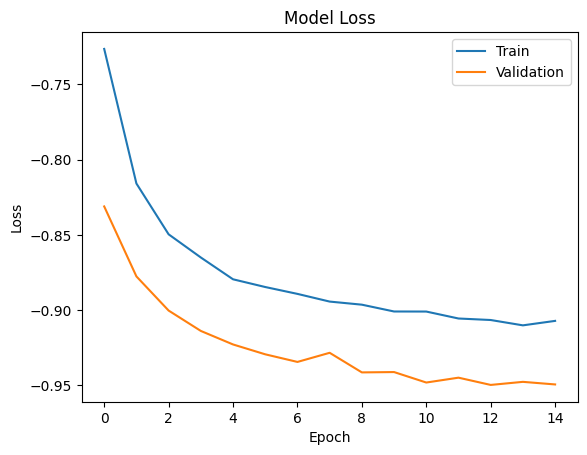

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [36]:
model_eval: float = model.evaluate(val_dat, y_test_vecs) 
print(f"Model loss {model_eval}")

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


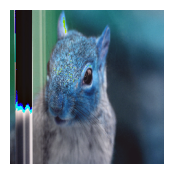

Actual label for image: squirrel
Prediction for image: squirrel, squirrels, squirrelly, monkey, squirrel-cage
Prediction cosine similarity to real label: 0.99



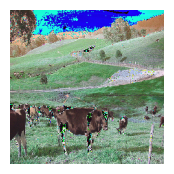

Actual label for image: cow
Prediction for image: cow, cows, buffalo, goat, cattle
Prediction cosine similarity to real label: 0.97



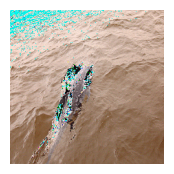

Actual label for image: dolphin
Prediction for image: otter, dolphin, walrus, whale, narwhal
Prediction cosine similarity to real label: 0.82



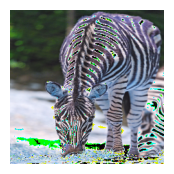

Actual label for image: zebra
Prediction for image: zebra, zebras, quagga, zebra-striped, Zebra
Prediction cosine similarity to real label: 1.0



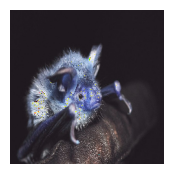

Actual label for image: bat
Prediction for image: squirrel, monkey, racoon, spider, woodlouse
Prediction cosine similarity to real label: 0.69



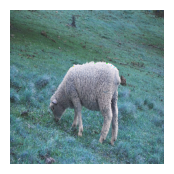

Actual label for image: sheep
Prediction for image: bear, bears, polar-bear, polar, bearing
Prediction cosine similarity to real label: 0.71



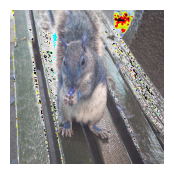

Actual label for image: squirrel
Prediction for image: squirrel, monkey, squirrels, squirrel-cage, squirrelly
Prediction cosine similarity to real label: 0.95



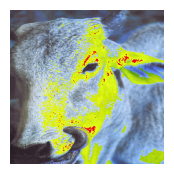

Actual label for image: cow
Prediction for image: horse, horses, horse-, race-horse, cart-horse
Prediction cosine similarity to real label: 0.66



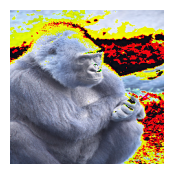

Actual label for image: gorilla
Prediction for image: gorilla, gorillas, chimpanzee, chimp, orangutan
Prediction cosine similarity to real label: 1.0



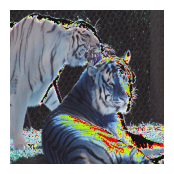

Actual label for image: tiger
Prediction for image: tiger, tigers, tigress, leopard, lion
Prediction cosine similarity to real label: 1.0



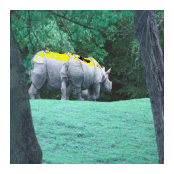

Actual label for image: rhinoceros
Prediction for image: elephant, elephants, rhinoceros, rhino, elephantine
Prediction cosine similarity to real label: 0.82



In [37]:
images_index: List[int] = [25, 27, 37, 49, 52, 54, 91,
                           94, 100, 190, 396]

index: int = 0
for index in images_index:
    # get image
    img: np.ndarray = val_dat[index].copy()

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(img), axis=0))

    # get label id
    id: int = y_test[index][0]

    # get label
    label: str = fine_labels[id]
    
    # get label vector
    vec: np.ndarray = fine_labels_vecs[id]

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    #img=np.clip(img,0,1)
   # plt.imshow(img)
    # print(abs(img)/255)
    plt.imshow(abs(img.astype("uint8")))
    #plt.imshow(img.astype('unit 8'))
    plt.axis('off')
    plt.show()
   

    # print actual label
    print(f"Actual label for image: {label}")

    # print the predictions for image
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")
    # print prediction similarity to actual class
    print("Prediction cosine similarity to real label: "
    f"{round(skpairwise.cosine_similarity(prediction, [vec])[0][0], 2)}\n")
  

In [ ]:
import json
    
# # Data to be written
# dictionary ={
#     "name" : "sathiyajith",
#     "rollno" : 56,
#     "cgpa" : 8.6,
#     "phonenumber" : "9976770500"
# }
    
# with open("sample.json", "w") as outfile:
#     json.dump(dictionary, outfile)

1/1 [==============================] - 0s 48ms/step


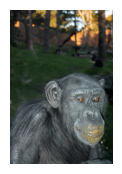

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\chimpanzee_10002.jpg
Prediction for image: gorilla, gorillas, chimpanzee, chimp, orangutan
Training time: 0.4826188087463379


In [8]:

import time
t0 = time.time()
save_pred = {}
#for img_path in glob.glob(r"D:\ZSL\devise-Awa2-october-2022\Test classes\*\*"):
for img_path in glob.glob(r"D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\*\*"):
    
    
#for img_path in glob.glob("/content/sample_data/test data/*"):

    img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
        img_path))

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
            img, (224, 224))), axis=0))

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # print the predictions for image
    save_pred[img_path] = [x[0] for x in most_similar]
    print("foler",img_path)
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")
print("Training time:", time.time()-t0)

In [ ]:
with open("resnet_50_13k.json", "w") as outfile:
    json.dump(save_pred, outfile)

In [ ]:
images_paths: List[str] = [
               '/content/sun_abyidesehxlvmzuc.jpg',
               '/content/sun_aevuwijdteejdcwb.jpg',
               '/content/sun_artqtbphljpsxezt.jpg',
               '/content/sun_bmkqffrgkfxtkdwd.jpg',
               '/content/sun_agcwrnqmqblepkwn.jpg'

                              

                           
               
                
]

img_path: str = ''
# for img_path in glob.glob("/content/drive/MyDrive/Zero-shot-main/Zero-short-learning/Practice-zsl/test-image/*"):

for img_path in images_paths:
    img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
        img_path))

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
            img, (224, 224))), axis=0))

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

In [ ]:



                         
               
                


img_path: str = ''
for img_path in glob.glob("/content/drive/MyDrive/Zero-shot-main/Zero-short-learning/Practice-zsl/test-image/*"):

#for img_path in images_paths:
    img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
        img_path))

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
            img, (224, 224))), axis=0))

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # print the predictions for image
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")